# __Segmenting and Clustering Neighborhoods in Toronto__

## Request and Response from Wikipedia

First, I will need to import the page in question and view the information on it.

In [1]:
import pandas as pd

In [2]:
import requests
page = requests.get("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M")
page.status_code

200

In [3]:
page.content

b'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>List of postal codes of Canada: M - Wikipedia</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"X@Id1QpAEJcAAn@KYwQAAACV","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_postal_codes_of_Canada:_M","wgTitle":"List of postal codes of Canada: M","wgCurRevisionId":995657573,"wgRevisionId":995657573,"wgArticleId":539066,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Short description is different from Wikidata","Communications in Ontario","Postal

We can see the page uses HTML, so let's arrange all the page information so we have a clearer view of what we're working with.

In [4]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(page.content, 'html.parser')

In [5]:
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of postal codes of Canada: M - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"X@Id1QpAEJcAAn@KYwQAAACV","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_postal_codes_of_Canada:_M","wgTitle":"List of postal codes of Canada: M","wgCurRevisionId":995657573,"wgRevisionId":995657573,"wgArticleId":539066,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Short description is different from Wikidata","Communications in Ontar

In [6]:
list(soup.children)

['html',
 '\n',
 <html class="client-nojs" dir="ltr" lang="en">
 <head>
 <meta charset="utf-8"/>
 <title>List of postal codes of Canada: M - Wikipedia</title>
 <script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"X@Id1QpAEJcAAn@KYwQAAACV","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_postal_codes_of_Canada:_M","wgTitle":"List of postal codes of Canada: M","wgCurRevisionId":995657573,"wgRevisionId":995657573,"wgArticleId":539066,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Short description is different from Wikidata","Communications in Ontario","Postal c

## Scrape from Wikipedia

So the information we are interested on the page is the table class wikitable sortable, as it contains all the infromation that we need. So first let's obtain our headers for the dataframe we will create.

In [7]:
all_tables=soup.find_all('table')
table = soup.find('table', {"class":'wikitable sortable'})

In [8]:
for row in table.findAll("tr"):
    cells = row.findAll('td')

len(cells)

3

In [9]:
rows = table.findAll("tr")
len(rows)

181

In [10]:
header = [th.text.rstrip() for th in rows[0].find_all('th')]
print(header)


['Postal Code', 'Borough', 'Neighbourhood']


## Get the Table Rows

Now, we will take the table values and put them into empty lists to be used for a dictionary later. 

In [11]:
c1=[]
c2=[]
c3=[]
for row in table.findAll("tr"):
    cells = row.findAll('td')
    if len(cells)==3: #Only extract table body not heading
        c1.append(cells[0].find(text=True))
        c2.append(cells[1].find(text=True))
        c3.append(cells[2].find(text=True))

## Create a Dictionary to convert into a Dataframe

Now let us create a dictionary, using the headers we found earlier as the keys and then assign the lists to the appropriate header.

In [12]:
d = dict([(x,0) for x in header])
d

{'Postal Code': 0, 'Borough': 0, 'Neighbourhood': 0}

In [13]:
d['Postal Code'] = c1
d['Borough'] = c2
d['Neighbourhood'] = c3

## Create a Dataframe with the Dictionary

Now we will use the dictionary and create a dataframe with it.

In [14]:
df_table = pd.DataFrame(d)
df_table.head(5)

,Postal Code,Borough,Neighbourhood
0,M1A\n,Not assigned\n,Not assigned\n
1,M2A\n,Not assigned\n,Not assigned\n
2,M3A\n,North York\n,Parkwoods\n
3,M4A\n,North York\n,Victoria Village\n
4,M5A\n,Downtown Toronto\n,"Regent Park, Harbourfront\n"


# Data Cleanup

### Remove Newline Characters from Values

As you can see from above, all of the values end in \n so we will begin by removing those first.

In [15]:
df_table['Postal Code'] = df_table['Postal Code'].replace('\n','',regex=True)
df_table['Borough'] = df_table['Borough'].replace('\n','',regex=True)
df_table['Neighbourhood'] = df_table['Neighbourhood'].replace('\n','',regex=True)
df_table.head()

,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


### Remove all Not Assigned values for Borough

As requested by the client, we will remove any rows where the Borough is not assigned.

In [16]:
df_table = df_table[df_table.Borough != 'Not assigned']
df_table

,Postal Code,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
...,...,...,...
160,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
165,M4Y,Downtown Toronto,Church and Wellesley
168,M7Y,East Toronto,"Business reply mail Processing Centre, South C..."
169,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


### Group by Postal Code and Combine Neighbourhood values

Also as requested by the client, we will account for postal codes that have more than one neighborhood by combining rows with the same postal code and having the multiple neighbourhoods displayed separated by a comma.

In [17]:
df_table = df_table.groupby(['Postal Code', 'Borough'])['Neighbourhood'].apply(', '.join).reset_index()
df_table

,Postal Code,Borough,Neighbourhood
0,M1B,Scarborough,"Malvern, Rouge"
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
...,...,...,...
98,M9N,York,Weston
99,M9P,Etobicoke,Westmount
100,M9R,Etobicoke,"Kingsview Village, St. Phillips, Martin Grove ..."
101,M9V,Etobicoke,"South Steeles, Silverstone, Humbergate, Jamest..."


### Replace All Not assigned values in Neighbourhood w/Borough value

As requested by the client, for any rows where the Neighbourhood is not assigned, we will assign the Borough value to it.

In [18]:
bor = df_table['Neighbourhood'] == 'Not assigned'
df_table.loc[bor, 'Neighbourhood'] = df_table.loc[bor, 'Borough']

df_table

For the sake of ease and consistency let's change the column for neighbourhood into neighborhood.

In [19]:
df_table = df_table.rename(columns={"Neighbourhood": "Neighborhood"})

In [20]:
df_table.shape

(103, 3)

## Read Latitude & Longitude CSV into Dataframe

## Import Provided CSV

For the latitude and longitude, first let's import the provided CSV.

In [21]:
from io import StringIO

url = "https://cocl.us/Geospatial_data"
req = requests.get(url).content
data = StringIO(req.decode('utf-8'))
latnlong = pd.read_csv(data)
latnlong.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


### Merge the Dataframes Based on Postal Code

Then we will merge the dataframes based on the common column Postal Code.

In [22]:
df = pd.merge(df_table, latnlong, on=['Postal Code'])

In [23]:
df

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
...,...,...,...,...,...
98,M9N,York,Weston,43.706876,-79.518188
99,M9P,Etobicoke,Westmount,43.696319,-79.532242
100,M9R,Etobicoke,"Kingsview Village, St. Phillips, Martin Grove ...",43.688905,-79.554724
101,M9V,Etobicoke,"South Steeles, Silverstone, Humbergate, Jamest...",43.739416,-79.588437


Just to verify, let us see the amount of data that we are working with.

In [24]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(df['Borough'].unique()),
        df.shape[0]
    )
)

The dataframe has 10 boroughs and 103 neighborhoods.


Next, for the analysis we will need to download several packages for visualization purposes.

In [25]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [26]:
from geopy.geocoders import Nominatim
import matplotlib.cm as cm
import matplotlib.colors as colors
import folium
import json
from pandas.io.json import json_normalize
import numpy as np

First, let us obtain the coordinates of Toronto.

In [27]:
address = 'Toronto, Ontario'

geolocator = Nominatim(user_agent="tor_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


With the coordinates, we can create a map and also add the coordinates of the venues.

In [28]:
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)
lat=df['Latitude']

# add markers to map
for lat, lng, borough, neighborhood in zip(df['Latitude'], df['Longitude'], df['Borough'], df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

For this assignment, let us only work with boroughs that contain "Toronto" in them.

In [29]:
toronto_data = df[df['Borough'].str.contains(pat='Toronto')].reset_index(drop=True)
toronto_data.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M4E,East Toronto,The Beaches,43.676357,-79.293031
1,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188
2,M4L,East Toronto,"India Bazaar, The Beaches West",43.668999,-79.315572
3,M4M,East Toronto,Studio District,43.659526,-79.340923
4,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790


Verifiying that we know which specific neigborhoods only contain "Toronto" in them.

In [30]:
toronto_data['Borough'].value_counts()


Downtown Toronto    19
Central Toronto      9
West Toronto         6
East Toronto         5
Name: Borough, dtype: int64

Now we will repeat what we did earlier: Find geographic coordinates and then display them but with our new filtered dataframe.

In [31]:
address = 'Toronto, Ontario'

geolocator = Nominatim(user_agent="tor_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [32]:
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)
lat=toronto_data['Latitude']

# add markers to map
for lat, lng, borough, neighborhood in zip(toronto_data['Latitude'], toronto_data['Longitude'], toronto_data['Borough'], toronto_data['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

Now we will the Foursquare API to explore the neighborhoods and segment them. (I will be hiding my credentials for obvious reasons.)

In [33]:
CLIENT_ID = 'PH1BJNNGD04HBEJFULZKQRD23QFBLVII2G00PQ3HFGVUIDRR'
CLIENT_SECRET = 'TNTC4RGMUTUUFQTBK0LPADRMFM13B5KDRYOOPNBNU2QV20LF'
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: PH1BJNNGD04HBEJFULZKQRD23QFBLVII2G00PQ3HFGVUIDRR
CLIENT_SECRET:TNTC4RGMUTUUFQTBK0LPADRMFM13B5KDRYOOPNBNU2QV20LF


In [34]:
neigh_lat = toronto_data.loc[0,'Latitude']
neigh_long = toronto_data.loc[0,'Longitude']
neigh = toronto_data.loc[0,'Neighborhood']

print('Latitude and Longitude of {} are {}, {}.'.format(neigh,
                                                        neigh_lat,
                                                        neigh_long))

Latitude and Longitude of The Beaches are 43.67635739999999, -79.2930312.


Let's get the top 100 venues in The Beaches within a radius of 500 meters.

In [35]:
LIMIT = 100
radius = 500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neigh_lat, 
    neigh_long, 
    radius, 
    LIMIT)
url


'https://api.foursquare.com/v2/venues/explore?&client_id=PH1BJNNGD04HBEJFULZKQRD23QFBLVII2G00PQ3HFGVUIDRR&client_secret=TNTC4RGMUTUUFQTBK0LPADRMFM13B5KDRYOOPNBNU2QV20LF&v=20180605&ll=43.67635739999999,-79.2930312&radius=500&limit=100'

In [36]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ff28fa36675562bfb40f10e'},
 'response': {'headerLocation': 'The Beaches',
  'headerFullLocation': 'The Beaches, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 6,
  'suggestedBounds': {'ne': {'lat': 43.680857404499996,
    'lng': -79.28682091449052},
   'sw': {'lat': 43.67185739549999, 'lng': -79.29924148550948}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4bd461bc77b29c74a07d9282',
       'name': 'Glen Manor Ravine',
       'location': {'address': 'Glen Manor',
        'crossStreet': 'Queen St.',
        'lat': 43.67682094413784,
        'lng': -79.29394208780985,
        'labeledLatLngs': [{'label': 'display',
          'lat': 43.67682094413784,
          'lng': -79.29394208780985}],
        'distanc

Let us obtain the category of the venues.

In [37]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Then we will take our results and store it in a dataframe.

In [38]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/Users/wesleyyoung/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Glen Manor Ravine,Trail,43.676821,-79.293942
1,The Big Carrot Natural Food Market,Health Food Store,43.678879,-79.297734
2,Grover Pub and Grub,Pub,43.679181,-79.297215
3,Domino's Pizza,Pizza Place,43.679058,-79.297382
4,Upper Beaches,Neighborhood,43.680563,-79.292869


In [39]:
print('There are {} venues in The Beaches neighborhood'.format(nearby_venues.shape[0]))

There are 6 venues in The Beaches neighborhood


We will now repeat everything we just did above with all neighborhoods in the Toronto area.

In [40]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [41]:

toronto_venues = getNearbyVenues(names=toronto_data['Neighborhood'],
                                   latitudes=toronto_data['Latitude'],
                                   longitudes=toronto_data['Longitude']
                                  )


The Beaches
The Danforth West, Riverdale
India Bazaar, The Beaches West
Studio District
Lawrence Park
Davisville North
North Toronto West,  Lawrence Park
Davisville
Moore Park, Summerhill East
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
Rosedale
St. James Town, Cabbagetown
Church and Wellesley
Regent Park, Harbourfront
Garden District, Ryerson
St. James Town
Berczy Park
Central Bay Street
Richmond, Adelaide, King
Harbourfront East, Union Station, Toronto Islands
Toronto Dominion Centre, Design Exchange
Commerce Court, Victoria Hotel
Roselawn
Forest Hill North & West, Forest Hill Road Park
The Annex, North Midtown, Yorkville
University of Toronto, Harbord
Kensington Market, Chinatown, Grange Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
Stn A PO Boxes
First Canadian Place, Underground city
Christie
Dufferin, Dovercourt Village
Little Portugal, Trinity
Brockton, Parkdale Village, Exhibition Place
High

We will verify how many venues by checking the size of the dataframe.

In [42]:
print(toronto_venues.shape)
toronto_venues.head()

(1618, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,The Beaches,43.676357,-79.293031,Glen Manor Ravine,43.676821,-79.293942,Trail
1,The Beaches,43.676357,-79.293031,The Big Carrot Natural Food Market,43.678879,-79.297734,Health Food Store
2,The Beaches,43.676357,-79.293031,Grover Pub and Grub,43.679181,-79.297215,Pub
3,The Beaches,43.676357,-79.293031,Domino's Pizza,43.679058,-79.297382,Pizza Place
4,The Beaches,43.676357,-79.293031,Upper Beaches,43.680563,-79.292869,Neighborhood


Now let's see how many venues are in each neighborhood.

In [43]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Berczy Park,58,58,58,58,58,58
"Brockton, Parkdale Village, Exhibition Place",24,24,24,24,24,24
"Business reply mail Processing Centre, South Central Letter Processing Plant Toronto",15,15,15,15,15,15
"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport",17,17,17,17,17,17
Central Bay Street,65,65,65,65,65,65
Christie,16,16,16,16,16,16
Church and Wellesley,80,80,80,80,80,80
"Commerce Court, Victoria Hotel",100,100,100,100,100,100
Davisville,34,34,34,34,34,34


How many unique categories can be curated from the returned venues?

In [44]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 232 uniques categories.


With that, let's begin to analyze each neighborhood.

In [45]:
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Yoga Studio,Adult Boutique,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Theater,Theme Restaurant,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The new dataframe size:

In [46]:
toronto_onehot.shape

(1618, 232)

New dataframe that groups rows by neighborhood and by the mean of the frequency of occurrence.

In [47]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Yoga Studio,Adult Boutique,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Theater,Theme Restaurant,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar
0,Berczy Park,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0000,0.000000,0.000000,0.000000,0.00,0.017241,0.000000,0.000000,0.000000
1,"Brockton, Parkdale Village, Exhibition Place",0.041667,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
2,"Business reply mail Processing Centre, South C...",0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
3,"CN Tower, King and Spadina, Railway Lands, Har...",0.000000,0.0000,0.058824,0.058824,0.058824,0.117647,0.176471,0.117647,0.000000,...,0.000000,0.0000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
4,Central Bay Street,0.015385,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0000,0.000000,0.000000,0.000000,0.00,0.015385,0.000000,0.000000,0.015385
5,Christie,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
6,Church and Wellesley,0.025000,0.0125,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012500,...,0.012500,0.0125,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.012500,0.000000
7,"Commerce Court, Victoria Hotel",0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,...,0.000000,0.0000,0.000000,0.000000,0.000000,0.00,0.020000,0.000000,0.000000,0.010000
8,Davisville,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0000,0.000000,0.029412,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
9,Davisville North,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000


The dataframe size

In [48]:
toronto_grouped.shape

(39, 232)

In [49]:
num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Berczy Park----
                venue  freq
0         Coffee Shop  0.10
1        Cocktail Bar  0.05
2      Farmers Market  0.03
3  Seafood Restaurant  0.03
4         Cheese Shop  0.03


----Brockton, Parkdale Village, Exhibition Place----
            venue  freq
0            Café  0.12
1          Bakery  0.08
2  Breakfast Spot  0.08
3     Coffee Shop  0.08
4     Yoga Studio  0.04


----Business reply mail Processing Centre, South Central Letter Processing Plant Toronto----
           venue  freq
0    Pizza Place  0.07
1  Garden Center  0.07
2           Park  0.07
3     Restaurant  0.07
4        Butcher  0.07


----CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport----
              venue  freq
0   Airport Service  0.18
1    Airport Lounge  0.12
2  Airport Terminal  0.12
3             Plane  0.06
4           Airport  0.06


----Central Bay Street----
                venue  freq
0         Coffee Shop  0.18
1      Sandwich Place 

Sort the venues in descending order.

In [50]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

New dataframe, and display the top 10 venues for each neighborhood.

In [51]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berczy Park,Coffee Shop,Cocktail Bar,Farmers Market,Beer Bar,Bakery,Cheese Shop,Seafood Restaurant,Restaurant,Grocery Store,Japanese Restaurant
1,"Brockton, Parkdale Village, Exhibition Place",Café,Bakery,Breakfast Spot,Coffee Shop,Grocery Store,Gym,Pet Store,Performing Arts Venue,Nightclub,Italian Restaurant
2,"Business reply mail Processing Centre, South C...",Pizza Place,Garden Center,Restaurant,Burrito Place,Fast Food Restaurant,Farmers Market,Spa,Garden,Butcher,Brewery
3,"CN Tower, King and Spadina, Railway Lands, Har...",Airport Service,Airport Lounge,Airport Terminal,Harbor / Marina,Boutique,Rental Car Location,Sculpture Garden,Plane,Boat or Ferry,Bar
4,Central Bay Street,Coffee Shop,Sandwich Place,Italian Restaurant,Café,Burger Joint,Salad Place,Bubble Tea Shop,Thai Restaurant,Ramen Restaurant,Portuguese Restaurant


Now we will use K means to cluster neighborhoods.

In [52]:
from sklearn.cluster import KMeans

First let's find the optimal K.

In [53]:
toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

distortions = []

K = range(1,20)
for k in K:
    kmean = KMeans(n_clusters=k, random_state=0, n_init = 50, max_iter = 500)
    kmean.fit(toronto_grouped_clustering)
    distortions.append(kmean.inertia_)

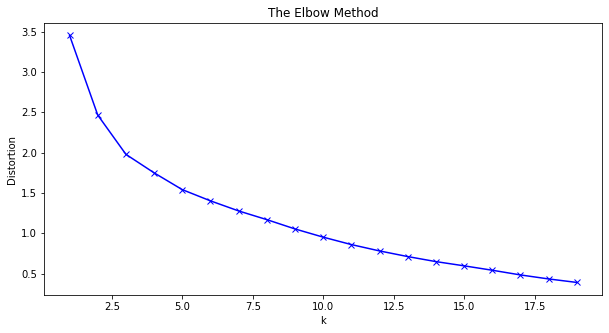

In [54]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method')
plt.show()

With the elbow method, the optimal K is where a tangent line on a point would be the most horizontal. I think it should be about 8.

In [55]:
kclusters = 8
toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)
kmeans = KMeans(n_clusters=kclusters, random_state=0)
kmeans.fit(toronto_grouped_clustering)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [56]:
kmeans_labels = kmeans.labels_
kmeans_labels

array([7, 0, 0, 7, 7, 0, 7, 7, 0, 0, 0, 7, 1, 7, 7, 0, 0, 7, 4, 7, 6, 0,
       0, 7, 0, 7, 3, 2, 0, 7, 0, 7, 0, 0, 0, 5, 0, 7, 7], dtype=int32)

New dataframe that includes the cluster and the top 10 venues for each neighborhood.

In [57]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
toronto_merged = toronto_data
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
toronto_merged.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M4E,East Toronto,The Beaches,43.676357,-79.293031,5,Asian Restaurant,Pizza Place,Trail,Pub,Health Food Store,Wine Bar,Discount Store,Department Store,Dessert Shop,Diner
1,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188,0,Greek Restaurant,Coffee Shop,Italian Restaurant,Furniture / Home Store,Bookstore,Ice Cream Shop,Grocery Store,Pub,Pizza Place,Lounge
2,M4L,East Toronto,"India Bazaar, The Beaches West",43.668999,-79.315572,0,Sandwich Place,Fast Food Restaurant,Sushi Restaurant,Fish & Chips Shop,Liquor Store,Burrito Place,Restaurant,Italian Restaurant,Intersection,Ice Cream Shop
3,M4M,East Toronto,Studio District,43.659526,-79.340923,0,Coffee Shop,Gastropub,Bakery,Brewery,Café,American Restaurant,Yoga Studio,Convenience Store,Seafood Restaurant,Cheese Shop
4,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790,4,Park,Bus Line,Swim School,Business Service,Ethiopian Restaurant,Escape Room,Electronics Store,Eastern European Restaurant,Donut Shop,Doner Restaurant


Just for my sanity, let's take a look at how many values are in which clusters.

In [58]:
toronto_merged['Cluster Labels'].value_counts()

0    17
7    16
6     1
5     1
4     1
3     1
2     1
1     1
Name: Cluster Labels, dtype: int64

Let's see how it looks on a map.

In [59]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Let's take a look at the clusters and find out what distinguishes them.

Cluster 1

In [60]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,East Toronto,0,Greek Restaurant,Coffee Shop,Italian Restaurant,Furniture / Home Store,Bookstore,Ice Cream Shop,Grocery Store,Pub,Pizza Place,Lounge
2,East Toronto,0,Sandwich Place,Fast Food Restaurant,Sushi Restaurant,Fish & Chips Shop,Liquor Store,Burrito Place,Restaurant,Italian Restaurant,Intersection,Ice Cream Shop
3,East Toronto,0,Coffee Shop,Gastropub,Bakery,Brewery,Café,American Restaurant,Yoga Studio,Convenience Store,Seafood Restaurant,Cheese Shop
5,Central Toronto,0,Park,Pizza Place,Hotel,Food & Drink Shop,Sandwich Place,Department Store,Gym / Fitness Center,Breakfast Spot,Doner Restaurant,Deli / Bodega
6,Central Toronto,0,Clothing Store,Coffee Shop,Bagel Shop,Fast Food Restaurant,Diner,Mexican Restaurant,Park,Chinese Restaurant,Café,Restaurant
7,Central Toronto,0,Pizza Place,Dessert Shop,Sandwich Place,Café,Coffee Shop,Italian Restaurant,Sushi Restaurant,Gym,Thai Restaurant,Park
9,Central Toronto,0,Coffee Shop,Sushi Restaurant,Pizza Place,Sandwich Place,Liquor Store,Restaurant,Pub,Bank,Bagel Shop,Supermarket
11,Downtown Toronto,0,Coffee Shop,Bakery,Pub,Italian Restaurant,Café,Pizza Place,Restaurant,Gift Shop,Bookstore,Playground
13,Downtown Toronto,0,Coffee Shop,Park,Bakery,Pub,Café,Breakfast Spot,Restaurant,Theater,Cosmetics Shop,Shoe Store
24,Central Toronto,0,Sandwich Place,Café,Coffee Shop,Park,History Museum,Burger Joint,Indian Restaurant,Middle Eastern Restaurant,Pub,BBQ Joint


*This cluster has a variety of food and retail as the most common venues.*

Cluster 2

In [61]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
23,Central Toronto,1,Park,Trail,Jewelry Store,Sushi Restaurant,Wine Bar,Deli / Bodega,Electronics Store,Eastern European Restaurant,Donut Shop,Doner Restaurant


*This cluster is the only cluster where the most common venues are parks and trails and also has retail food.*

Cluster 3

In [62]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
22,Central Toronto,2,Garden,Wine Bar,Deli / Bodega,Ethiopian Restaurant,Escape Room,Electronics Store,Eastern European Restaurant,Donut Shop,Doner Restaurant,Dog Run


*This looks to be the only cluster where gardens are the most common venue!*

Cluster 4

In [63]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,Downtown Toronto,3,Park,Trail,Playground,Dance Studio,Escape Room,Electronics Store,Eastern European Restaurant,Donut Shop,Doner Restaurant,Dog Run


*This cluster has parks and trails as the most common venues alongside playgrounds and other non-retail venues.*

Cluster 5

In [64]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Central Toronto,4,Park,Bus Line,Swim School,Business Service,Ethiopian Restaurant,Escape Room,Electronics Store,Eastern European Restaurant,Donut Shop,Doner Restaurant


*This cluster has parks and bus lines as the most common venues.*

Cluster 6

In [66]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 5, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,East Toronto,5,Asian Restaurant,Pizza Place,Trail,Pub,Health Food Store,Wine Bar,Discount Store,Department Store,Dessert Shop,Diner


*This cluster's most common venue is Asian Restaurants*

Cluster 7

In [67]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 6, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,Central Toronto,6,Restaurant,Trail,Playground,Tennis Court,Discount Store,Deli / Bodega,Department Store,Dessert Shop,Diner,Wine Bar


*This cluster is the only cluster with a non-specific restaurant as the most common venue.*

Cluster 8

In [68]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 7, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,Downtown Toronto,7,Coffee Shop,Japanese Restaurant,Sushi Restaurant,Restaurant,Gay Bar,Yoga Studio,Café,Men's Store,Mediterranean Restaurant,Hotel
14,Downtown Toronto,7,Coffee Shop,Clothing Store,Café,Japanese Restaurant,Bubble Tea Shop,Hotel,Cosmetics Shop,Middle Eastern Restaurant,Italian Restaurant,Fast Food Restaurant
15,Downtown Toronto,7,Coffee Shop,Café,American Restaurant,Gastropub,Cocktail Bar,Department Store,Clothing Store,Park,Moroccan Restaurant,Lingerie Store
16,Downtown Toronto,7,Coffee Shop,Cocktail Bar,Farmers Market,Beer Bar,Bakery,Cheese Shop,Seafood Restaurant,Restaurant,Grocery Store,Japanese Restaurant
17,Downtown Toronto,7,Coffee Shop,Sandwich Place,Italian Restaurant,Café,Burger Joint,Salad Place,Bubble Tea Shop,Thai Restaurant,Ramen Restaurant,Portuguese Restaurant
18,Downtown Toronto,7,Coffee Shop,Café,Restaurant,Hotel,Deli / Bodega,Gym,Thai Restaurant,Sushi Restaurant,Burrito Place,Pizza Place
19,Downtown Toronto,7,Coffee Shop,Aquarium,Hotel,Café,Italian Restaurant,Scenic Lookout,Brewery,Restaurant,Fried Chicken Joint,Pizza Place
20,Downtown Toronto,7,Coffee Shop,Hotel,Café,Restaurant,Italian Restaurant,Seafood Restaurant,Salad Place,American Restaurant,Japanese Restaurant,Concert Hall
21,Downtown Toronto,7,Coffee Shop,Restaurant,Hotel,Café,Gym,American Restaurant,Deli / Bodega,Japanese Restaurant,Seafood Restaurant,Italian Restaurant
25,Downtown Toronto,7,Café,Bakery,Bar,Italian Restaurant,Japanese Restaurant,Bookstore,Sandwich Place,Bank,Beer Bar,Beer Store


*This cluster has coffee shops and cafes as the most common venues.*